<a href="https://colab.research.google.com/github/aymanred121/handwritten-signature-recognition/blob/main/model/handwrittenClassificationv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import datasets, layers, models
import cv2

In [ ]:
!rm -rf /content/*

rm: cannot remove '/content/gdrive/.shortcut-targets-by-id': Operation canceled
rm: cannot remove '/content/gdrive/MyDrive': Operation canceled
rm: cannot remove '/content/gdrive/.file-revisions-by-id': Operation canceled
rm: cannot remove '/content/gdrive/.Trash-0': Directory not empty


In [ ]:
!gdown 1WqIhqp9JJ65SZPs9v868P_-SBCVTR2By

Downloading...
From: https://drive.google.com/uc?id=1WqIhqp9JJ65SZPs9v868P_-SBCVTR2By
To: /content/CV_2023_SC_Dataset.zip
100% 1.20M/1.20M [00:00<00:00, 162MB/s]


In [ ]:
!unzip /content/CV_2023_SC_Dataset.zip -d /content/data

Archive:  /content/CV_2023_SC_Dataset.zip
   creating: /content/data/personA/Test/
  inflating: /content/data/personA/Test/personA_10.png  
  inflating: /content/data/personA/Test/personA_13.png  
  inflating: /content/data/personA/Test/personA_2.png  
  inflating: /content/data/personA/Test/personA_20.png  
  inflating: /content/data/personA/Test/personA_27.png  
  inflating: /content/data/personA/Test/personA_29.png  
  inflating: /content/data/personA/Test/personA_30.png  
  inflating: /content/data/personA/Test/personA_42.png  
  inflating: /content/data/personA/Test/personA_SigVerificationTestLabels.csv  
   creating: /content/data/personA/Train/
  inflating: /content/data/personA/Train/personA_1.png  
  inflating: /content/data/personA/Train/personA_11.png  
  inflating: /content/data/personA/Train/personA_12.png  
  inflating: /content/data/personA/Train/personA_14.png  
  inflating: /content/data/personA/Train/personA_15.png  
  inflating: /content/data/personA/Train/personA_16

In [ ]:
import os
persons = ['A','B','C','D','E']
os.mkdir('/content/Train')
os.mkdir('/content/Test')
for p in persons:
    os.mkdir('/content/Train/person'+p)
    os.mkdir('/content/Test/person'+p)
    

In [ ]:
import shutil
import os
import glob
for p in os.listdir('data'):
  print(p)
  for f in os.listdir(f'data/{p}'):
    for d in glob.glob(f'/content/data/{p}/{f}/*'):
      shutil.move(d,f'/content/{f}/{p}')

personC
personB
personA
personD
personE


In [ ]:
persons = ['A','B','C','D','E']
df = pd.DataFrame()
for person in  persons:
  path = f'/content/Train/person{person}/person{person}_SigVerificationTrainLabels.csv'
  tempdf = pd.read_csv(path)
  tempdf['person'] = person
  df = df.append(tempdf)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)


In [ ]:
person = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4
}
df['person'] = df['person'].map(person)

In [ ]:
labels = {
    'real':0,
    'forged':1
}
df['label'] = df['label'].map(labels)

In [ ]:
df['person'].value_counts()

1    40
4    40
0    40
2    40
3    40
Name: person, dtype: int64

In [ ]:
dad=cv2.imread('/content/Test/personA/personA_10.png')

In [ ]:
dad.shape

(318, 343, 3)

In [ ]:
model = models.Sequential([
    layers.Conv2D(96, (11, 11), activation='relu', input_shape=(215, 90, 1),strides=4),
    layers.MaxPooling2D((3,3),strides=(4,4),padding='same'),
    layers.Conv2D(256, (5, 5), activation='relu',padding='same'),
    layers.MaxPooling2D((3,3),padding='same'),
    layers.Conv2D(384, (3, 3), activation='relu',strides=1,padding='same'),

    layers.Conv2D(384, (3, 3), activation='relu',strides=1,padding='same'),

    layers.Conv2D(256, (3, 3), activation='relu',strides=1,padding='same'),
    layers.MaxPooling2D((3,3),strides=2,padding='same'),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [ ]:
model.summary()

In [ ]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "Train/",
    labels="inferred",
    label_mode="categorical",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="rgb",
    batch_size=32,
    image_size=(215, 90),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "Train/",
    labels="inferred",
    label_mode="categorical",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="rgb",
    batch_size=32,
    image_size=(215, 90),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    "Test/",
    labels="inferred",
    label_mode="categorical",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
     color_mode="rgb",
    batch_size=32,
    image_size=(215, 90),  # reshape if not in this size
    shuffle=True,
    seed=123,
    )

Found 200 files belonging to 5 classes.
Using 180 files for training.
Found 200 files belonging to 5 classes.
Using 20 files for validation.
Found 40 files belonging to 5 classes.


In [ ]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(215, 90,3)
)
model = models.Sequential([
    model,
    tf.keras.layers.Dense(4096),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(ds_train,epochs=50,validation_data=ds_validation)

Epoch 1/50
6/6 [==============================] - 8s 359ms/step - loss: 8.1705 - acc: 0.6778 - val_loss: 328.9658 - val_acc: 0.5500
Epoch 2/50
6/6 [==============================] - 1s 175ms/step - loss: 0.1732 - acc: 0.9556 - val_loss: 5435.3247 - val_acc: 0.4500
Epoch 3/50
6/6 [==============================] - 1s 177ms/step - loss: 0.3079 - acc: 0.9722 - val_loss: 20284.4570 - val_acc: 0.3000
Epoch 4/50
6/6 [==============================] - 1s 185ms/step - loss: 7.9971 - acc: 0.9278 - val_loss: 3279731.7500 - val_acc: 0.1000
Epoch 5/50
6/6 [==============================] - 1s 177ms/step - loss: 1.1528 - acc: 0.9556 - val_loss: 169988752.0000 - val_acc: 0.1000
Epoch 6/50
6/6 [==============================] - 1s 176ms/step - loss: 1.7279 - acc: 0.9056 - val_loss: 342837824.0000 - val_acc: 0.1000
Epoch 7/50
6/6 [==============================] - 1s 176ms/step - loss: 0.3162 - acc: 0.9611 - val_loss: 301996480.0000 - val_acc: 0.1000
Epoch 8/50
6/6 [==============================] - 1

KeyboardInterrupt: ignored

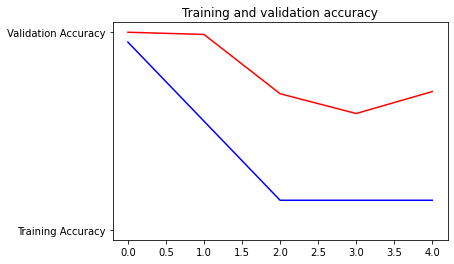

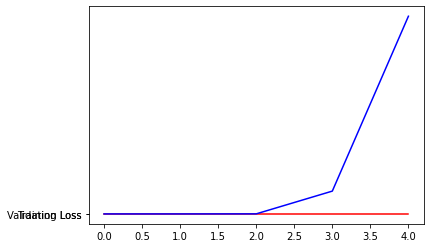

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")



In [ ]:
model.evaluate(ds_test)

2/2 [==============================] - 0s 37ms/step - loss: 0.0377 - acc: 1.0000


[0.03770343214273453, 1.0]

In [ ]:
model.save('resnet.h5')

In [ ]:
m = models.load_model('resnet.h5')
m.evaluate(ds_test)

2/2 [==============================] - 1s 38ms/step - loss: 0.0377 - acc: 1.0000


[0.03770343214273453, 1.0]

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!gdown 1YnJxJRREnGo8bOq2sv5Y_ZWdaHRAZi_Q

Downloading...
From: https://drive.google.com/uc?id=1YnJxJRREnGo8bOq2sv5Y_ZWdaHRAZi_Q
To: /content/CV2023TestSamples.zip
100% 590k/590k [00:00<00:00, 155MB/s]


In [ ]:
!unzip /content/CV2023TestSamples.zip -d t

In [ ]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    "testD/",
    labels="inferred",
    label_mode="categorical",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
     color_mode="rgb",
    batch_size=32,
    image_size=(215, 90),  # reshape if not in this size
    shuffle=True,
    seed=123,
    )

Found 5 files belonging to 5 classes.


In [ ]:
m.evaluate(test)

1/1 [==============================] - 1s 502ms/step - loss: 9.5367e-08 - acc: 1.0000


[9.53674117454284e-08, 1.0]

In [ ]:
m.save('resnet_class_sig.h5')

In [ ]:
!cp /content/resnet_class_sig.h5 /content/drive/MyDrive